In [1]:
import sys
import json
sys.path.append("../")
from src.data_utils import load_captions, make_train_test_images
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_hub as hub


In [2]:
# Loading data
CAPTIONS_PATH = "../data/Flickr_Data/Flickr_TextData/Flickr8k.token.txt"
IMAGES_PATH = "../data/Flickr_Data/Images/"
captions = load_captions(CAPTIONS_PATH)
train, test, train_images, test_images = make_train_test_images(CAPTIONS_PATH, IMAGES_PATH)

In [3]:
module_handle = "https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1"

detector = hub.load(module_handle).signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
2022-01-13 16:45:56.542212: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-13 16:45:56.561457: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [4]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

In [5]:
img = load_img(train_images[0])
converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

In [6]:
out = detector(converted_img)

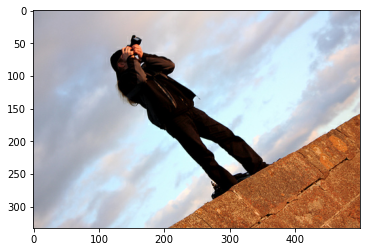

In [8]:
plt.imshow(img)

In [9]:
out['detection_boxes']

<tf.Tensor: shape=(100, 4), dtype=float32, numpy=
array([[0.12550312, 0.24217695, 0.8564363 , 0.70848536],
       [0.1623106 , 0.23042454, 0.84292746, 0.7116083 ],
       [0.1312677 , 0.2276201 , 0.8823997 , 0.6864356 ],
       [0.12550312, 0.24217695, 0.8564363 , 0.70848536],
       [0.38612044, 0.33983237, 0.8502705 , 0.702009  ],
       [0.15564111, 0.23511955, 0.85565543, 0.71420455],
       [0.18591614, 0.2659347 , 0.2776952 , 0.3125528 ],
       [0.15355176, 0.2844153 , 0.22708786, 0.32720125],
       [0.24429637, 0.29301846, 0.8207024 , 0.6337175 ],
       [0.05021104, 0.6351497 , 0.62751484, 0.90321887],
       [0.15163907, 0.29852256, 0.22349933, 0.34602168],
       [0.2531069 , 0.25285727, 0.6324545 , 0.6601184 ],
       [0.04506946, 0.5460172 , 0.6179162 , 0.98733896],
       [0.11661687, 0.24104424, 0.49575976, 0.46675014],
       [0.37407145, 0.6296892 , 0.6973002 , 0.791939  ],
       [0.04481313, 0.72993433, 0.6535033 , 0.99019635],
       [0.16033696, 0.6933651 , 0.5196

In [65]:
def extract_regions(img, bounding_boxes):
    width, height, _ = img.shape
    features = []
    for n, (y1, x1, y2, x2) in enumerate(bounding_boxes):
        x1 = int(width * x1)
        x2 = int(width * x2)
        y1 = int(height * y1)
        y2 = int(height * y2)
        if (x1 != x2) and (y1 != y2):
            features.append(img[x1:x2+1, y1:y2+1, :])
    return features        

In [66]:
features = extract_regions(converted_img[0], out['detection_boxes'])

In [67]:
len(features)

100

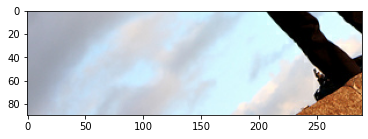

In [64]:
plt.imshow(features[9])